<a href="https://colab.research.google.com/github/entc-17-fyp-20/ResultsComparison/blob/Kusal/CNN(research_paper_2017)_model_for_short_term_power_forecasting_Belgium_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataframe** 

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset
url13 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Belgium_2017_15_min.csv' #Belgium-2017 dataset

**Train an validation data set**

In [14]:
df = pd.read_csv(url13)
df=pd.DataFrame(df)
df_temp=df.copy()
df_temp.count

<bound method DataFrame.count of                         Datetime Resolution code Offshore/onshore    Region  \
0      2017-12-31 23:45:00+01:00           PT15M          Onshore  Flanders   
1      2017-12-31 23:30:00+01:00           PT15M          Onshore  Flanders   
2      2017-12-31 23:15:00+01:00           PT15M          Onshore  Flanders   
3      2017-12-31 23:00:00+01:00           PT15M          Onshore  Flanders   
4      2017-12-31 22:45:00+01:00           PT15M          Onshore  Flanders   
...                          ...             ...              ...       ...   
26399  2017-04-01 01:00:00+02:00           PT15M          Onshore  Flanders   
26400  2017-04-01 00:45:00+02:00           PT15M          Onshore  Flanders   
26401  2017-04-01 00:30:00+02:00           PT15M          Onshore  Flanders   
26402  2017-04-01 00:15:00+02:00           PT15M          Onshore  Flanders   
26403  2017-04-01 00:00:00+02:00           PT15M          Onshore  Flanders   

      Grid connect

In [ ]:
# test_set_1 = df_temp[5000:5500]  #10/1/2021 00:00 to 10/10/2021 23:50
# test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
# test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

# dataset_index=1

# if dataset_index==1:
#   df_test = test_set_1
# elif dataset_index==2:
#   df_test = test_set_2
# elif dataset_index==3:
#   df_test = test_set_3

#df_test

In [15]:
df_temp

,Datetime,Resolution code,Offshore/onshore,Region,Grid connection type,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2017-12-31 23:45:00+01:00,PT15M,Onshore,Flanders,Elia,40.67,45.41,41.45,48.65,46.60,...,49.52,46.24,40.95,49.79,30.49,13.63,46.53,53.86,0.76,0
1,2017-12-31 23:30:00+01:00,PT15M,Onshore,Flanders,Elia,42.19,44.93,40.51,48.53,46.17,...,49.55,45.80,40.02,49.84,30.54,13.74,46.54,53.86,0.78,0
2,2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,...,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0
3,2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,...,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
4,2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,...,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26399,2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.57,3.21,0.48,6.56,2.47,...,5.67,3.78,0.61,6.96,16.81,2.73,30.91,63.01,0.07,0
26400,2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.91,2.82,0.53,5.73,1.93,...,4.69,3.38,0.54,6.18,16.66,2.67,30.67,63.01,0.06,0
26401,2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.60,2.53,0.58,5.06,1.56,...,3.97,3.06,0.49,5.54,16.48,2.58,30.39,63.01,0.06,0
26402,2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.85,2.24,0.64,4.39,1.20,...,3.26,2.75,0.43,4.91,16.29,2.50,30.10,63.01,0.05,0


**Rename column names**

In [16]:
col_1=(df_temp.columns)[0]
col_2=(df_temp.columns)[5]
feature = 'Active Power'
# feature_1 = 'Forecasted Power'
df_temp.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)
#df


In [17]:
df_temp

,Date & Time,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2017-12-31 23:45:00+01:00,PT15M,Onshore,Flanders,Elia,40.67,45.41,41.45,48.65,46.60,...,49.52,46.24,40.95,49.79,30.49,13.63,46.53,53.86,0.76,0
1,2017-12-31 23:30:00+01:00,PT15M,Onshore,Flanders,Elia,42.19,44.93,40.51,48.53,46.17,...,49.55,45.80,40.02,49.84,30.54,13.74,46.54,53.86,0.78,0
2,2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,...,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0
3,2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,...,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
4,2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,...,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26399,2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.57,3.21,0.48,6.56,2.47,...,5.67,3.78,0.61,6.96,16.81,2.73,30.91,63.01,0.07,0
26400,2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.91,2.82,0.53,5.73,1.93,...,4.69,3.38,0.54,6.18,16.66,2.67,30.67,63.01,0.06,0
26401,2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.60,2.53,0.58,5.06,1.56,...,3.97,3.06,0.49,5.54,16.48,2.58,30.39,63.01,0.06,0
26402,2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.85,2.24,0.64,4.39,1.20,...,3.26,2.75,0.43,4.91,16.29,2.50,30.10,63.01,0.05,0


In [ ]:
#df_temp.loc[13047]

**Set Data & Time as index**

In [18]:
df_temp=df_temp.set_index('Date & Time')
df_temp=df_temp[::-1]
df_temp

,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Date & Time,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,PT15M,Onshore,Flanders,Elia,2.34,1.95,0.69,3.72,0.84,0.00,2.54,2.44,0.38,4.27,16.11,2.42,29.81,63.01,0.04,0
2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.85,2.24,0.64,4.39,1.20,0.01,3.26,2.75,0.43,4.91,16.29,2.50,30.10,63.01,0.05,0
2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.60,2.53,0.58,5.06,1.56,0.02,3.97,3.06,0.49,5.54,16.48,2.58,30.39,63.01,0.06,0
2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.91,2.82,0.53,5.73,1.93,0.03,4.69,3.38,0.54,6.18,16.66,2.67,30.67,63.01,0.06,0
2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.57,3.21,0.48,6.56,2.47,0.04,5.67,3.78,0.61,6.96,16.81,2.73,30.91,63.01,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,37.26,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,38.22,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,39.15,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0


In [19]:
scaler = MinMaxScaler()

In [20]:
df_temp=pd.DataFrame(df_temp[feature])
df_temp[feature] = scaler.fit_transform(df_temp)
df_temp

,Active Power
Date & Time,
2017-04-01 00:00:00+02:00,0.05
2017-04-01 00:15:00+02:00,0.06
2017-04-01 00:30:00+02:00,0.07
2017-04-01 00:45:00+02:00,0.08
2017-04-01 01:00:00+02:00,0.09
...,...
2017-12-31 22:45:00+01:00,0.78
2017-12-31 23:00:00+01:00,0.84
2017-12-31 23:15:00+01:00,0.87


In [21]:
T = 400
HORIZON = 16

In [22]:
for i in range(1,HORIZON+1):
  df_temp['y_t+'+str(i)] = df_temp[feature].shift(-i)
df_temp.head(10)

,Active Power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,y_t+10,y_t+11,y_t+12,y_t+13,y_t+14,y_t+15,y_t+16
Date & Time,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,0.05,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33
2017-04-01 00:15:00+02:00,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31
2017-04-01 00:30:00+02:00,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28
2017-04-01 00:45:00+02:00,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22
2017-04-01 01:00:00+02:00,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18
2017-04-01 01:15:00+02:00,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15
2017-04-01 01:30:00+02:00,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15
2017-04-01 01:45:00+02:00,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15,0.14
2017-04-01 02:00:00+02:00,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15,0.14,0.13


In [23]:
for t in range(1, T+1):
    df_temp['active_power_t-'+str(T-t)] = df_temp[feature].shift(T-t)
df_temp = df_temp.rename(columns={feature:'Current_active_power'})
df_temp

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,0.05,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
2017-04-01 00:15:00+02:00,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06
2017-04-01 00:30:00+02:00,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07
2017-04-01 00:45:00+02:00,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07,0.08
2017-04-01 01:00:00+02:00,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,...,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07,0.08,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,0.78,0.84,0.87,0.88,0.84,NaN,NaN,NaN,NaN,NaN,...,0.77,0.79,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78
2017-12-31 23:00:00+01:00,0.84,0.87,0.88,0.84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.79,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78,0.84
2017-12-31 23:15:00+01:00,0.87,0.88,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78,0.84,0.87


In [24]:
df_temp = df_temp.dropna(how='any')
df_temp

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-05 03:45:00+02:00,0.27,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,...,0.24,0.20,0.19,0.21,0.21,0.19,0.19,0.19,0.27,0.27
2017-04-05 04:00:00+02:00,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,...,0.20,0.19,0.21,0.21,0.19,0.19,0.19,0.27,0.27,0.28
2017-04-05 04:15:00+02:00,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,...,0.19,0.21,0.21,0.19,0.19,0.19,0.27,0.27,0.28,0.24
2017-04-05 04:30:00+02:00,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,...,0.21,0.21,0.19,0.19,0.19,0.27,0.27,0.28,0.24,0.20
2017-04-05 04:45:00+02:00,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,0.26,...,0.21,0.19,0.19,0.19,0.27,0.27,0.28,0.24,0.20,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 18:45:00+01:00,0.62,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,...,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62
2017-12-31 19:00:00+01:00,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,...,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67
2017-12-31 19:15:00+01:00,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,0.83,...,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67,0.68


In [25]:
df = df_temp[:25000]
df

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-05 03:45:00+02:00,0.27,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,...,0.24,0.20,0.19,0.21,0.21,0.19,0.19,0.19,0.27,0.27
2017-04-05 04:00:00+02:00,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,...,0.20,0.19,0.21,0.21,0.19,0.19,0.19,0.27,0.27,0.28
2017-04-05 04:15:00+02:00,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,...,0.19,0.21,0.21,0.19,0.19,0.19,0.27,0.27,0.28,0.24
2017-04-05 04:30:00+02:00,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,...,0.21,0.21,0.19,0.19,0.19,0.27,0.27,0.28,0.24,0.20
2017-04-05 04:45:00+02:00,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,0.26,...,0.21,0.19,0.19,0.19,0.27,0.27,0.28,0.24,0.20,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21 11:30:00+01:00,0.09,0.08,0.08,0.07,0.08,0.08,0.07,0.05,0.07,0.06,...,0.07,0.07,0.08,0.09,0.08,0.07,0.08,0.08,0.08,0.09
2017-12-21 11:45:00+01:00,0.08,0.08,0.07,0.08,0.08,0.07,0.05,0.07,0.06,0.06,...,0.07,0.08,0.09,0.08,0.07,0.08,0.08,0.08,0.09,0.08
2017-12-21 12:00:00+01:00,0.08,0.07,0.08,0.08,0.07,0.05,0.07,0.06,0.06,0.03,...,0.08,0.09,0.08,0.07,0.08,0.08,0.08,0.09,0.08,0.08


**Divide train and validation sets**

In [26]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

#print(train.shape)
#print(valid.shape)
#print(test.shape)

#print(train.describe())
#print(valid.describe())
#print(test.describe())

# **Data preparation**

**Train input and target arrays**

In [27]:
y_train = np.array(train[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_train=np.array(train[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [28]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], 20,20, 1)

In [29]:
print(y_train.shape)
print(X_train.shape)

(20000, 16)
(20000, 20, 20, 1)


**Data preparation - Validation data**

In [30]:
y_valid = np.array(valid[["y_t+"+str(i) for i in range(1,HORIZON+1)]])
X_valid=np.array(valid[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], 20,20, 1)

In [31]:
print(y_valid.shape)
print(X_valid.shape)

(5000, 16)
(5000, 20, 20, 1)


# **Implement the GRU-RNN**

In [32]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(20,20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(HORIZON, activation='relu'))

In [34]:
UNITS = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 100 # maximum number of times the training algorithm will cycle through all samples

In [ ]:
# model = Sequential()
# model.add(GRU(UNITS, input_shape=(T, 1)))
# model.add(Dense(HORIZON))

In [35]:
model.compile(optimizer='RMSprop', loss='mse')
#model.summary()

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 6)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 12)          1812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 16)                7

In [37]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [38]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/100
625/625 [==============================] - 7s 9ms/step - loss: 0.0317 - val_loss: 0.0327
Epoch 2/100
625/625 [==============================] - 5s 9ms/step - loss: 0.0244 - val_loss: 0.0282
Epoch 3/100
625/625 [==============================] - 5s 9ms/step - loss: 0.0220 - val_loss: 0.0265
Epoch 4/100
625/625 [==============================] - 5s 9ms/step - loss: 0.0206 - val_loss: 0.0260
Epoch 5/100
625/625 [==============================] - 6s 10ms/step - loss: 0.0196 - val_loss: 0.0260
Epoch 6/100
625/625 [==============================] - 5s 9ms/step - loss: 0.0187 - val_loss: 0.0211
Epoch 7/100
625/625 [==============================] - 5s 9ms/step - loss: 0.0133 - val_loss: 0.0194
Epoch 8/100
625/625 [==============================] - 5s 9ms/step - loss: 0.0123 - val_loss: 0.0176
Epoch 9/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0120 - val_loss: 0.0186
Epoch 10/100
625/625 [==============================] - 6s 9ms/step - loss: 0.0117 - val_l

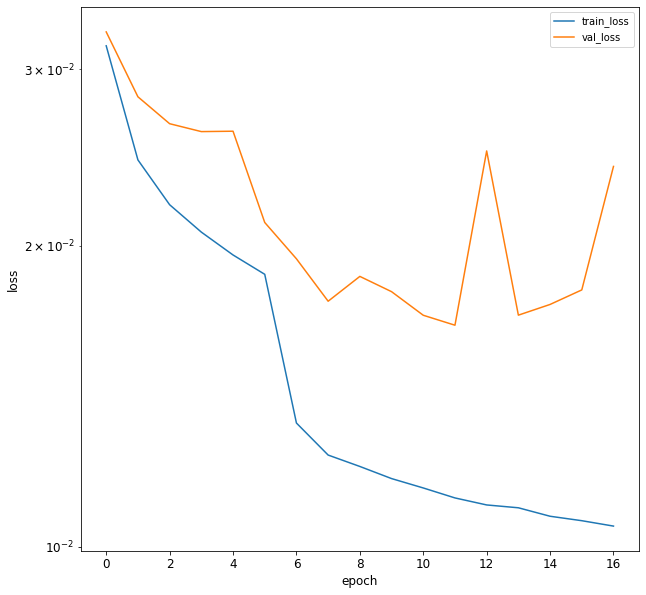

In [39]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# # Save the weights
# path = '/content/drive/MyDrive/Colab Notebooks/Weights/GRU/model.h5'
# model.save(path)

# **Evaluate the model**

**Load test data set**

In [ ]:
#df_test = pd.read_csv(url11)
#df_test=pd.DataFrame(df_test)

In [42]:
test_set_1 = df_temp[25000:]  #10/1/2021 00:00 to 10/10/2021 23:50
test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

dataset_index=1

if dataset_index==1:
  df_test = test_set_1
elif dataset_index==2:
  df_test = test_set_2
elif dataset_index==3:
  df_test = test_set_3

df_test

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-12-21 12:45:00+01:00,0.08,0.07,0.05,0.07,0.06,0.06,0.03,0.03,0.06,0.06,...,0.07,0.08,0.08,0.08,0.09,0.08,0.08,0.07,0.08,0.08
2017-12-21 13:00:00+01:00,0.07,0.05,0.07,0.06,0.06,0.03,0.03,0.06,0.06,0.06,...,0.08,0.08,0.08,0.09,0.08,0.08,0.07,0.08,0.08,0.07
2017-12-21 13:15:00+01:00,0.05,0.07,0.06,0.06,0.03,0.03,0.06,0.06,0.06,0.06,...,0.08,0.08,0.09,0.08,0.08,0.07,0.08,0.08,0.07,0.05
2017-12-21 13:30:00+01:00,0.07,0.06,0.06,0.03,0.03,0.06,0.06,0.06,0.06,0.04,...,0.08,0.09,0.08,0.08,0.07,0.08,0.08,0.07,0.05,0.07
2017-12-21 13:45:00+01:00,0.06,0.06,0.03,0.03,0.06,0.06,0.06,0.06,0.04,0.03,...,0.09,0.08,0.08,0.07,0.08,0.08,0.07,0.05,0.07,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 18:45:00+01:00,0.62,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,...,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62
2017-12-31 19:00:00+01:00,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,...,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67
2017-12-31 19:15:00+01:00,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,0.83,...,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67,0.68


In [ ]:
# col_1=(df_test.columns)[0]
# col_2=(df_test.columns)[5]
# #col_3=(df_test.columns)[2]
# feature = 'Active Power'
# feature_1 = 'Forecasted Power'
# df_test.rename(columns={col_1 :'Date & Time' , col_2 : feature },inplace=True)

In [ ]:
# df_test=df_test.set_index('Date & Time')
# #df_test = df_test.apply(pd.to_numeric)
# #df_test=df_test.div(1000)
# df

,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Date & Time,,,,,,,,,,,,,,,,,,,,
2017-04-05 05:00:00+02:00,PT15M,Onshore,Flanders,Elia,9.88,8.11,2.61,13.62,8.47,2.02,15.23,8.13,1.88,14.74,9.80,0.67,19.03,63.01,0.16,0
2017-04-05 05:15:00+02:00,PT15M,Onshore,Flanders,Elia,11.26,8.48,2.74,14.22,8.75,2.21,15.59,8.60,2.21,15.33,9.80,0.63,19.07,63.01,0.18,0
2017-04-05 05:30:00+02:00,PT15M,Onshore,Flanders,Elia,9.96,8.84,2.87,14.82,9.04,2.41,15.95,9.08,2.55,15.91,9.81,0.59,19.11,63.01,0.16,0
2017-04-05 05:45:00+02:00,PT15M,Onshore,Flanders,Elia,11.01,9.21,3.00,15.42,9.32,2.60,16.30,9.55,2.88,16.49,9.81,0.56,19.14,63.01,0.17,0
2017-04-05 06:00:00+02:00,PT15M,Onshore,Flanders,Elia,13.45,10.73,3.77,16.85,9.49,2.69,16.54,9.80,3.05,16.80,9.85,0.53,19.24,63.01,0.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,37.26,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,38.22,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,39.15,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0


In [43]:
feature = "Current_active_power"
count = (df_test[feature] == 0).sum()
count

0

**Preprocessing technique**

In [44]:
#df_test[feature]=df_test[feature].replace(0,df_test[feature].median())
df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [45]:
y_test = np.array(df_test[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_test=np.array(df_test[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], 20,20, 1)
#X_test

In [46]:
print(y_test.shape)
print(X_test.shape)

(989, 16)
(989, 20, 20, 1)


In [47]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0   0.07 0.07 0.08 0.07 0.09 0.09 0.09 0.08 0.09 0.10 0.09 0.10 0.10 0.10   
1   0.08 0.08 0.08 0.09 0.09 0.09 0.09 0.10 0.10 0.10 0.10 0.11 0.11 0.11   
2   0.07 0.07 0.07 0.09 0.08 0.09 0.09 0.09 0.09 0.09 0.10 0.10 0.10 0.10   
3   0.08 0.07 0.07 0.09 0.09 0.08 0.09 0.09 0.10 0.09 0.10 0.10 0.10 0.10   
4   0.07 0.07 0.07 0.09 0.08 0.08 0.09 0.10 0.10 0.09 0.10 0.10 0.10 0.11   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
984 0.40 0.39 0.37 0.39 0.37 0.39 0.40 0.40 0.43 0.41 0.43 0.40 0.42 0.43   
985 0.46 0.45 0.44 0.46 0.44 0.46 0.46 0.47 0.49 0.46 0.51 0.46 0.49 0.50   
986 0.52 0.51 0.51 0.53 0.50 0.53 0.53 0.53 0.54 0.50 0.56 0.49 0.53 0.54   
987 0.56 0.55 0.56 0.58 0.55 0.57 0.58 0.56 0.56 0.53 0.59 0.52 0.55 0.56   
988 0.60 0.59 0.59 0.59 0.58 0.60 0.59 0.58 0.58 0.56 0.60 0.55 0.57 0.58   

      14   15  
0   0.11 0.09  
1   0.11 0.10  
2   0.11 0.10  
3   0.11 0.

In [49]:
x = pd.DataFrame()
x['Date & Time'] = df_test.index
x['Current output power']= np.array(df_test['Current_active_power'])
x['Current output power']=scaler.inverse_transform(np.array(x[['Current output power']]))
for i in range(1,HORIZON+1):
  x['predictions t+'+str(i)]=predictions[i-1]
  x[['predictions t+'+str(i)]]=scaler.inverse_transform(np.array(x[['predictions t+'+str(i)]]))
  x['actual t+'+str(i)]=pd.DataFrame(y_test)[i-1]
  x[['actual t+'+str(i)]]=scaler.inverse_transform(np.array(x[['actual t+'+str(i)]]))
  
x

,Date & Time,Current output power,predictions t+1,actual t+1,predictions t+2,actual t+2,predictions t+3,actual t+3,predictions t+4,actual t+4,...,predictions t+12,actual t+12,predictions t+13,actual t+13,predictions t+14,actual t+14,predictions t+15,actual t+15,predictions t+16,actual t+16
0,2017-12-21 12:45:00+01:00,3.82,3.48,3.38,3.42,2.61,3.88,3.36,3.34,2.97,...,4.87,2.09,4.92,1.44,4.95,2.16,5.38,2.50,4.50,1.94
1,2017-12-21 13:00:00+01:00,3.38,3.85,2.61,3.77,3.36,3.89,2.97,4.19,2.77,...,5.41,1.44,5.09,2.16,5.11,2.50,5.51,1.94,4.93,2.30
2,2017-12-21 13:15:00+01:00,2.61,3.46,3.36,3.27,2.97,3.60,2.77,4.15,1.55,...,4.80,2.16,4.87,2.50,4.78,1.94,5.23,2.30,4.68,2.86
3,2017-12-21 13:30:00+01:00,3.36,3.71,2.97,3.46,2.77,3.41,1.55,4.43,1.66,...,4.91,2.50,4.72,1.94,4.99,2.30,5.19,2.86,4.96,3.10
4,2017-12-21 13:45:00+01:00,2.97,3.38,2.77,3.42,1.55,3.22,1.66,4.10,2.76,...,4.70,1.94,4.87,2.30,5.14,2.86,5.25,3.10,5.03,3.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2017-12-31 18:45:00+01:00,29.75,19.20,32.33,18.66,32.84,17.66,37.55,18.82,39.18,...,19.03,37.21,20.37,36.47,20.80,38.43,19.04,38.21,20.28,37.72
985,2017-12-31 19:00:00+01:00,32.33,21.97,32.84,21.55,37.55,21.03,39.18,22.30,36.77,...,22.07,36.47,23.40,38.43,24.04,38.21,22.07,37.72,23.34,40.59
986,2017-12-31 19:15:00+01:00,32.84,24.93,37.55,24.60,39.18,24.54,36.77,25.48,35.71,...,23.69,38.43,25.38,38.21,25.90,37.72,23.94,40.59,25.24,41.74
987,2017-12-31 19:30:00+01:00,37.55,26.98,39.18,26.56,36.77,26.76,35.71,27.83,37.17,...,25.19,38.21,26.60,37.72,27.14,40.59,25.34,41.74,26.55,42.19


**Performance Evaluation over all steps for 1 input**

In [66]:
row_1=x.iloc[0]

In [86]:
def mae(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)
def mse(actual,pred):
    actual, pred = np.array(actual), np.array(pred)
    return(np.mean((actual - pred)**2))

from sklearn.metrics import r2_score

In [93]:
actual = np.array(row_1[["actual t+"+str(i) for i in range(1,HORIZON+1)]])
pred = np.array(row_1[["predictions t+"+str(i) for i in range(1,HORIZON+1)]])
print(mae(actual, pred))
print(rmse(actual,pred))
print(mse(actual,pred))
print('R^2 for model = '+ str(round(r2_score(actual, pred),2)))

0.8726635100208543
2.066730988765988
4.271376979925638
R^2 for model = -10.88


**Performance metrics for each step**

In [92]:
for i in range(1,HORIZON+1):
  actual = x['actual t+'+str(i)]
  pred = x['predictions t+'+str(i)]
  mae_value=mae(actual, pred)
  rmse_value=rmse(actual,pred)
  mse_value=mse(actual,pred)
  
  print('CNN Model: MAE  for t+'+str(i)+ ' = '+str(mae_value))
  print('CNN Model: RMSE for t+'+str(i)+' = '+str(rmse_value))
  print('CNN Model: MSE  for t+'+str(i)+ ' = '+str(mse_value))
  # print('CNN Model: R^2 for t+'+str(i)+'= '+str(round(r2_score(actual, pred),2))

CNN Model: MAE  for t+1 = 0.3021459484948378
CNN Model: RMSE for t+1 = 8.455490270845402
CNN Model: MSE  for t+1 = 71.49531572036125
CNN Model: MAE  for t+2 = 0.31536492662015086
CNN Model: RMSE for t+2 = 8.78386421257449
CNN Model: MSE  for t+2 = 77.15627050494689
CNN Model: MAE  for t+3 = 0.32513060379114245
CNN Model: RMSE for t+3 = 9.09183386049055
CNN Model: MSE  for t+3 = 82.66144294676249
CNN Model: MAE  for t+4 = 0.34640621783357917
CNN Model: RMSE for t+4 = 9.531300809759873
CNN Model: MSE  for t+4 = 90.84569512612921
CNN Model: MAE  for t+5 = 0.35203118580738096
CNN Model: RMSE for t+5 = 9.820728285185137
CNN Model: MSE  for t+5 = 96.44670405143539
CNN Model: MAE  for t+6 = 0.3626884676916802
CNN Model: RMSE for t+6 = 9.9480283161929
CNN Model: MSE  for t+6 = 98.96326737977574
CNN Model: MAE  for t+7 = 0.3769233875732541
CNN Model: RMSE for t+7 = 10.379383058631445
CNN Model: MSE  for t+7 = 107.73159267780545
CNN Model: MAE  for t+8 = 0.3873027279573825
CNN Model: RMSE for t+

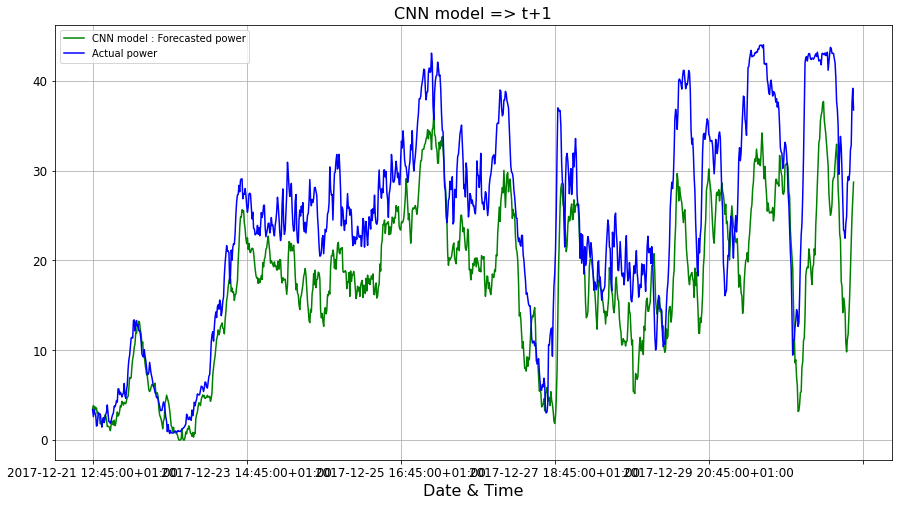

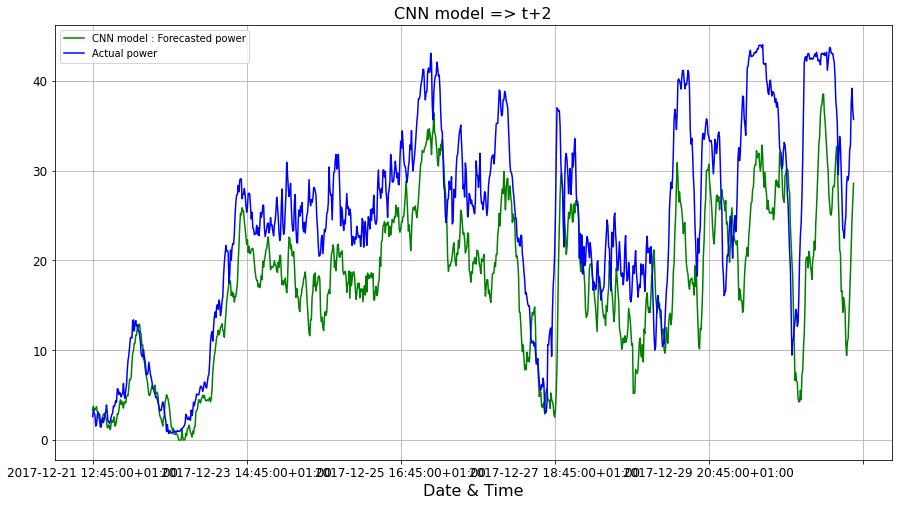

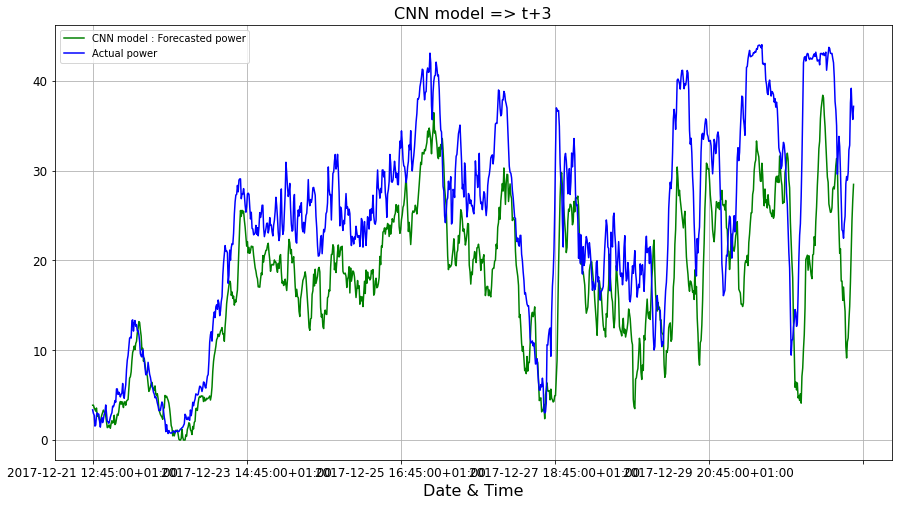

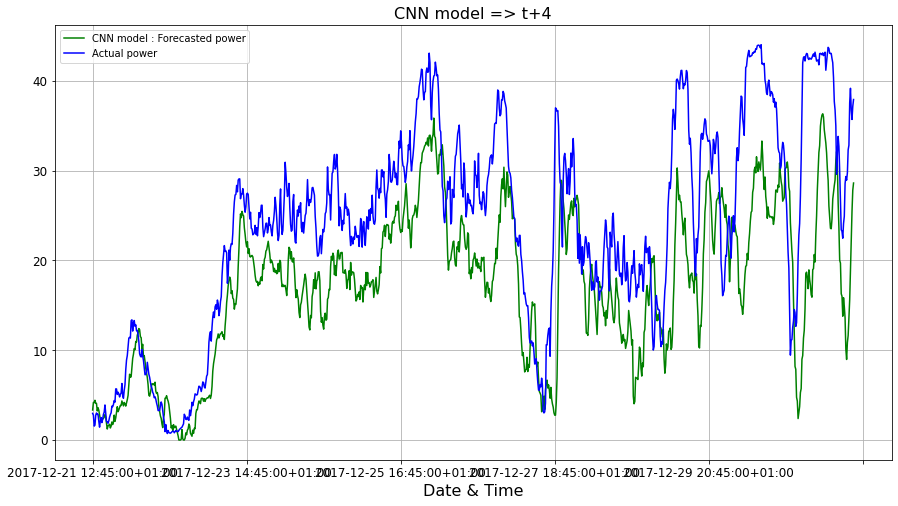

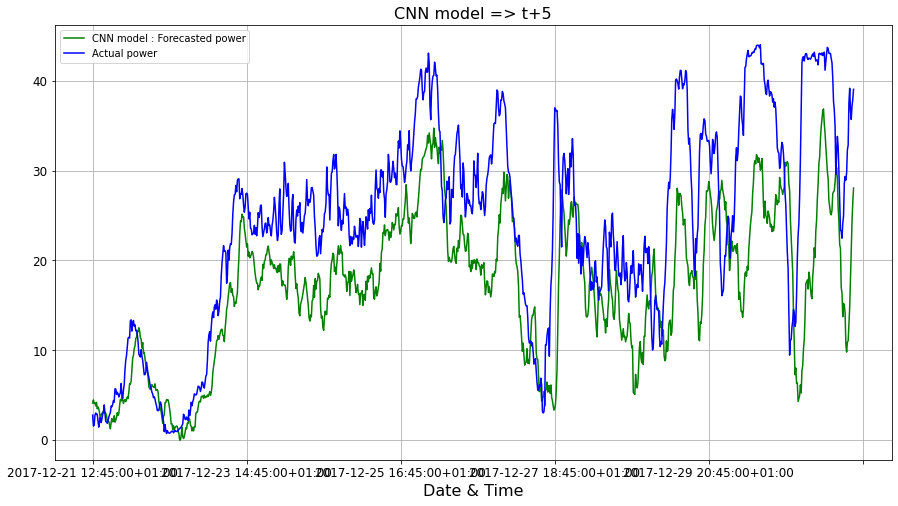

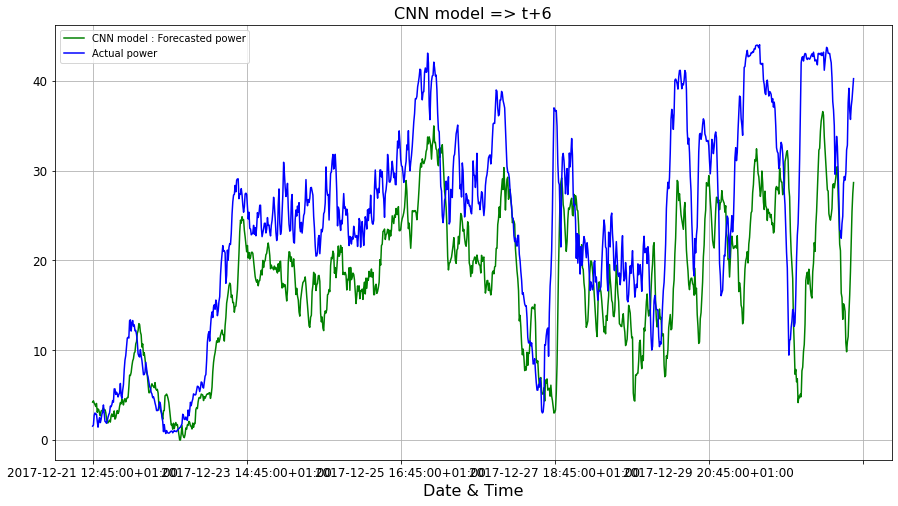

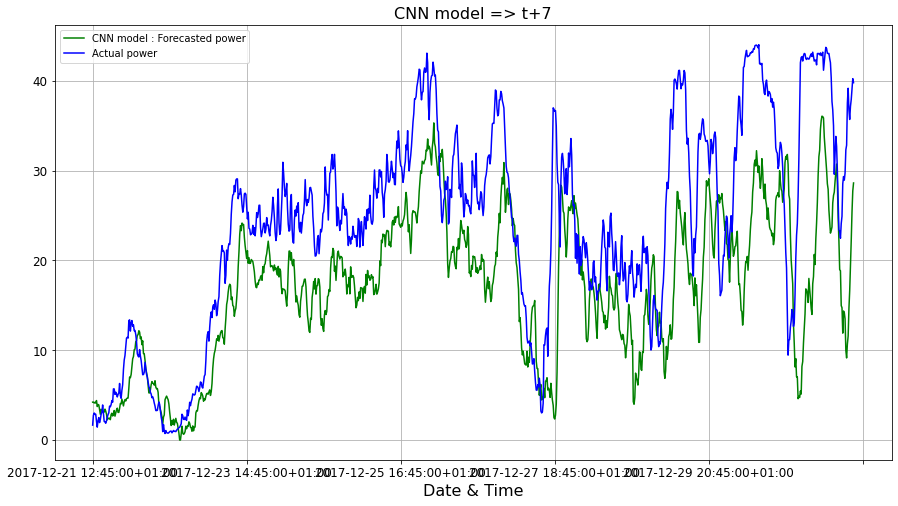

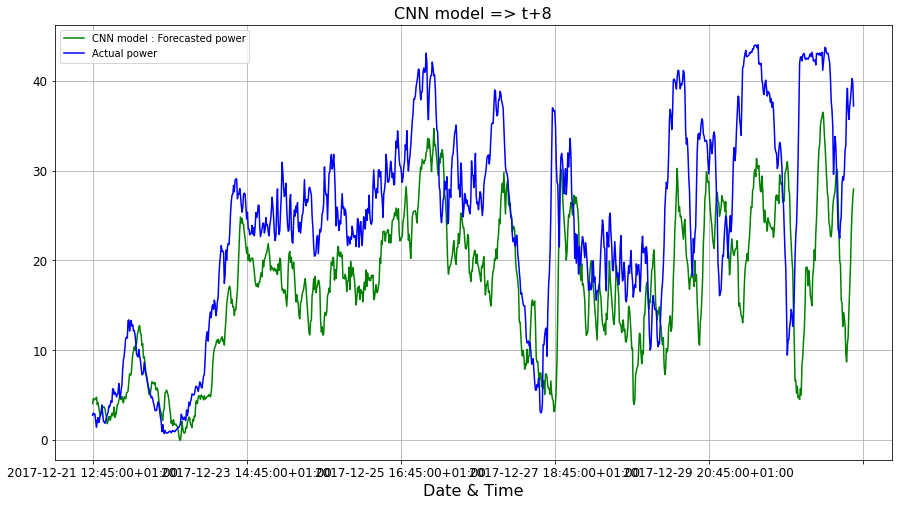

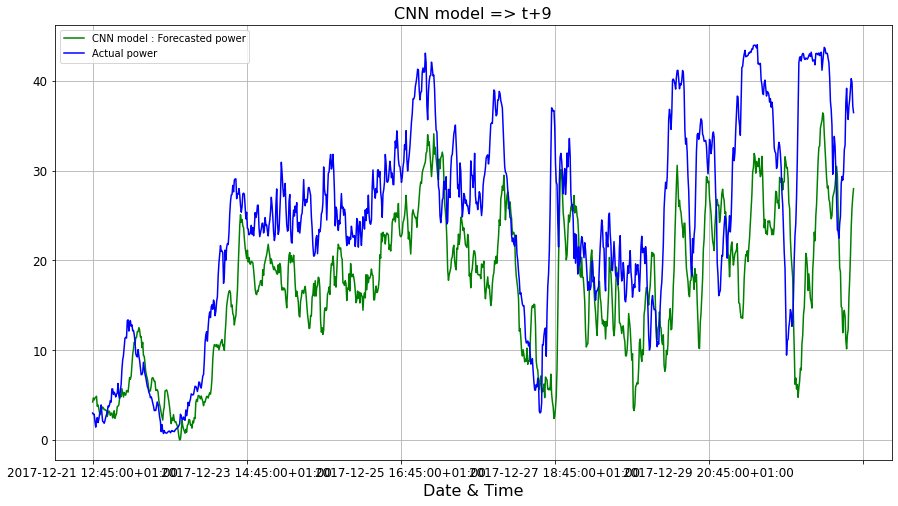

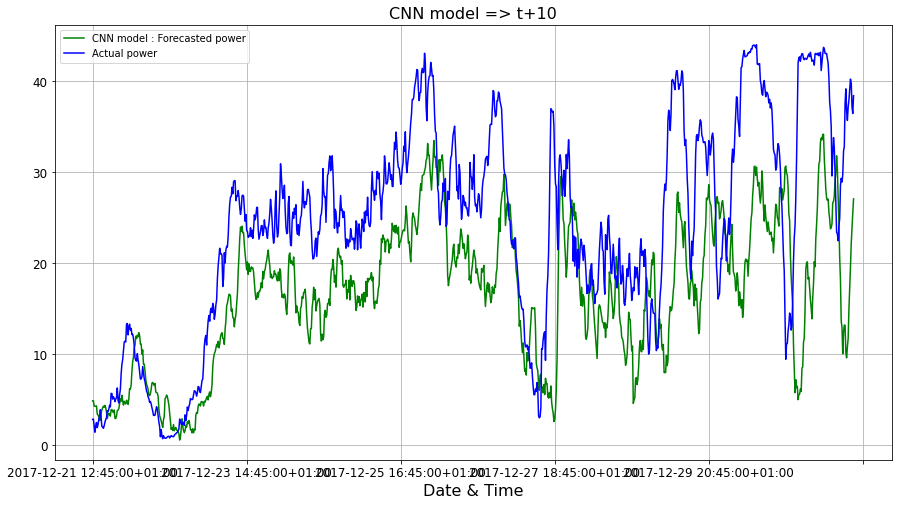

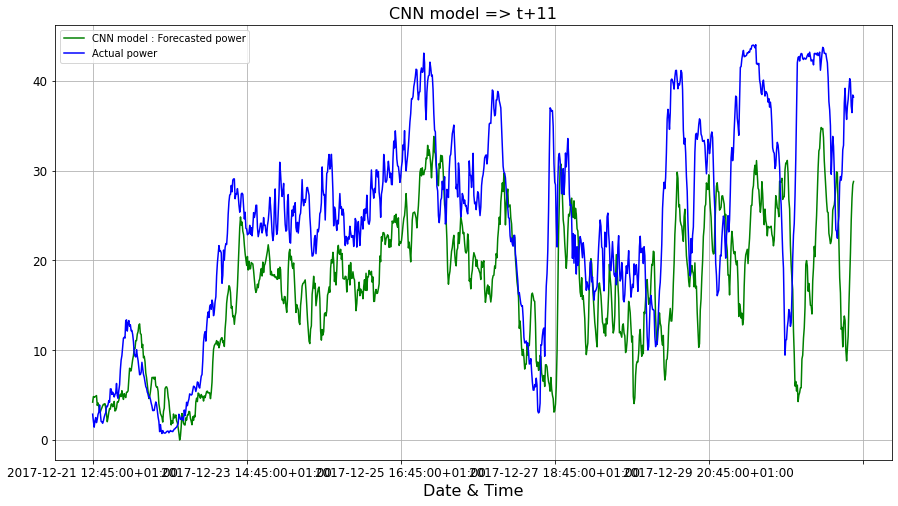

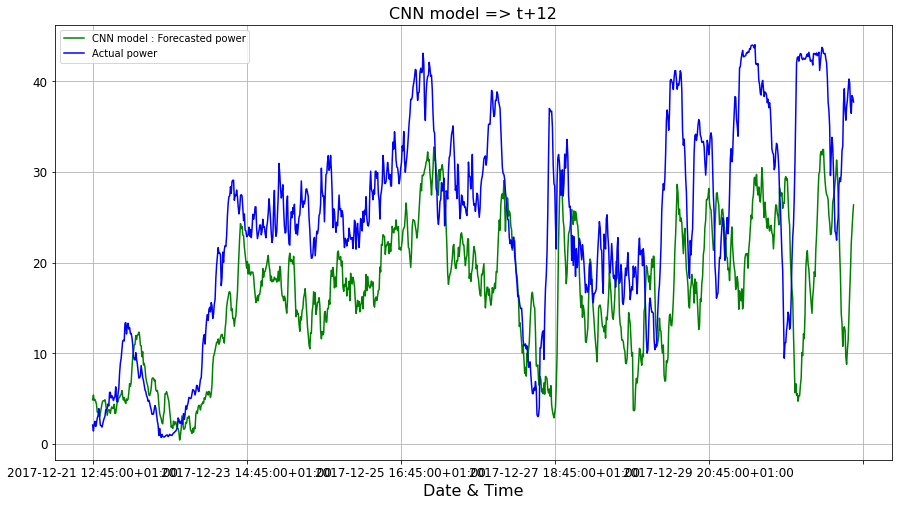

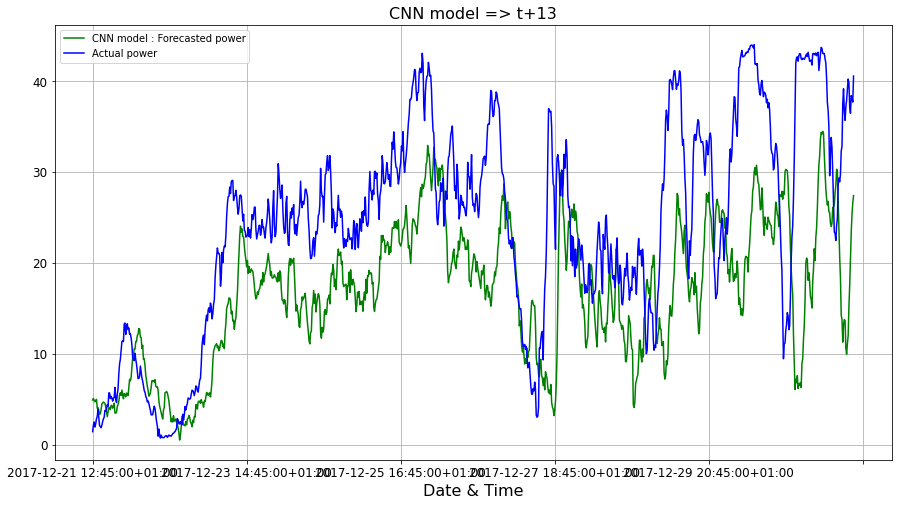

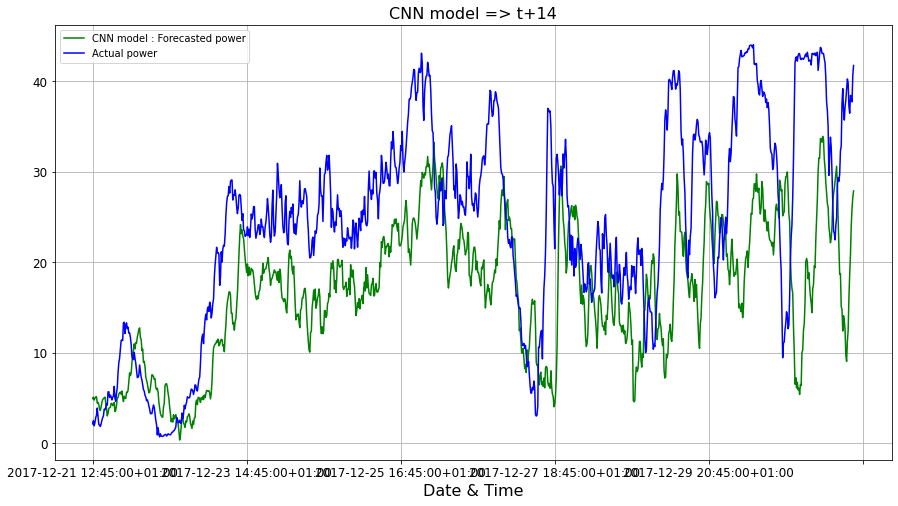

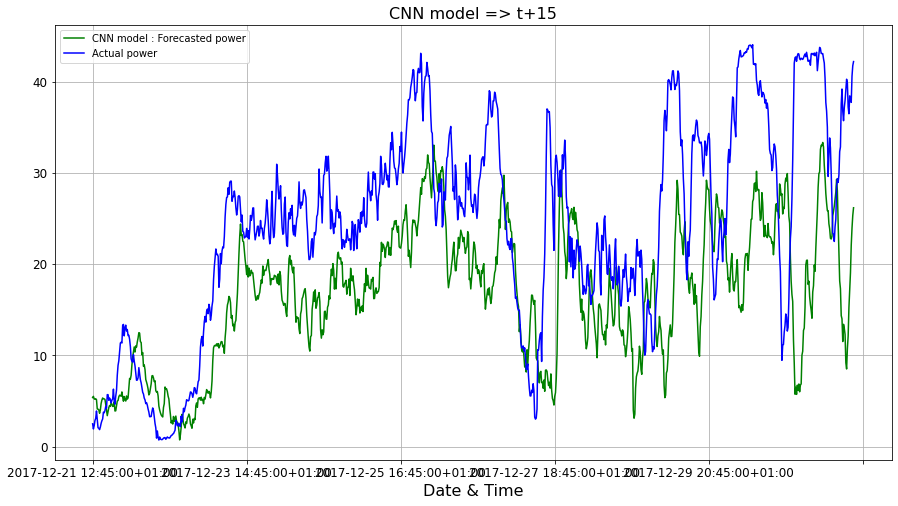

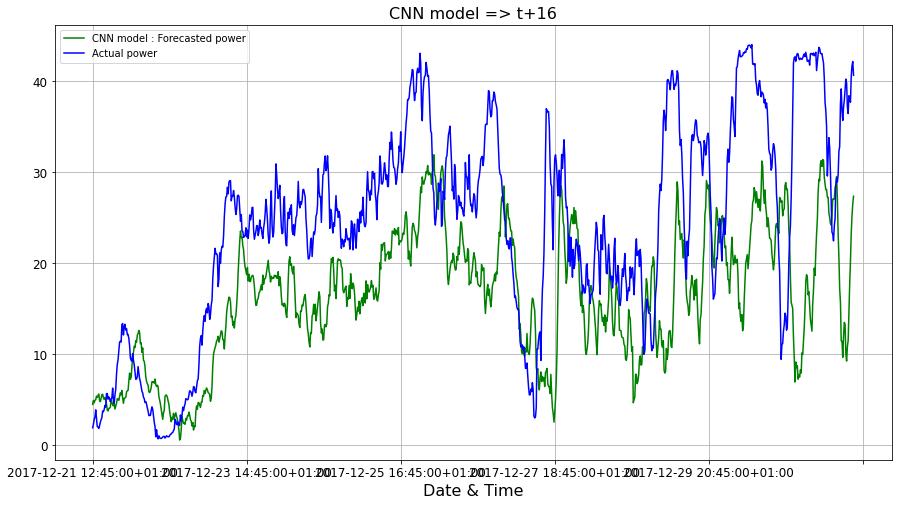

In [70]:
for i in range(1,HORIZON+1):
  x.plot(x='Date & Time', y=['predictions t+'+str(i),'actual t+'+str(i),], style=['g','b'],fontsize=12, figsize=(15, 8))
  plt.title("CNN model => t+"+str(i),fontsize=16)
  plt.xlabel('Date & Time', fontsize=16)
  plt.legend(['CNN model : Forecasted power', 'Actual power'])
  plt.grid()
  # plt.savefig("benchmark.png")
  plt.show()

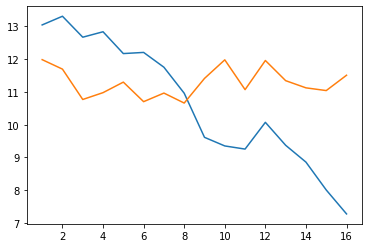

In [80]:
row=x.iloc[56]

y_axis_actual = np.array(row[["actual t+"+str(i) for i in range(1,HORIZON+1)]])
y_axis_pred = np.array(row[["predictions t+"+str(i) for i in range(1,HORIZON+1)]])
x_axis = np.array([i for i in range(1,17)])

plt.plot(x_axis,y_axis_actual)
plt.plot(x_axis,y_axis_pred)
plt.show()

In [ ]:
fig1 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="CNN model:Expected vs predicted power forecasting") 
fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig1.show()

In [ ]:
fig2 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="GRU model:Expected vs predicted power") 
fig2.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig2.show()

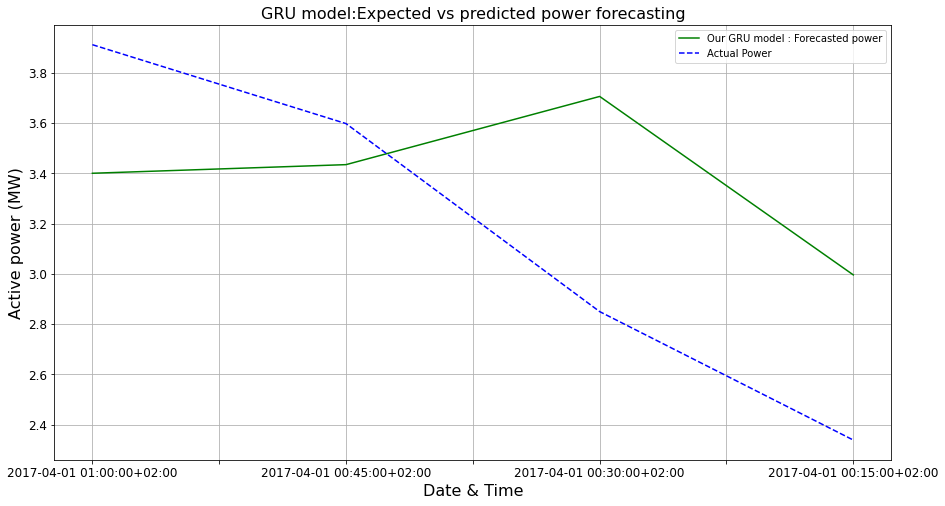

In [ ]:
eval_df.plot(x='Date & Time', y=['prediction','actual'], style=['g','--b'],fontsize=12, figsize=(15, 8))
plt.title("GRU model:Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Our GRU model : Forecasted power', 'Actual Power'])
plt.savefig("GRU-results.pdf")
plt.savefig("GRU-results.png")
plt.show()